In [1]:
#Importing all the Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df_classification = pd.read_csv(r"C:\Users\vanis\Downloads\Dataset_classification.csv")
df_classification.head()

,discount_percentage,product_price,delivery_delay_days,customer_satisfaction,returned,time_on_product_page,product_weight_kg,warehouse_distance_km,days_since_last_purchase,number_of_items_in_order,session_length_minutes,return_history_count,product_category_score,days_to_shipment
0,0.18,0.87,1,0.15,0,0.28,0.29,16.91,13,3,13,1,0.65,2
1,0.66,2.65,1,1.83,1,0.40,0.11,2.64,12,1,20,2,2.05,3
2,2.38,3.20,0,2.54,1,1.40,0.71,2.63,14,1,27,1,0.42,4
3,2.61,3.04,2,2.67,1,0.80,0.31,2.48,13,1,26,0,0.16,3
4,0.56,0.49,0,0.46,0,0.06,0.24,0.85,13,1,44,1,1.19,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   discount_percentage       1000 non-null   float64
 1   product_price             1000 non-null   float64
 2   delivery_delay_days       1000 non-null   int64  
 3   customer_satisfaction     1000 non-null   float64
 4   returned                  1000 non-null   int64  
 5   time_on_product_page      1000 non-null   float64
 6   product_weight_kg         1000 non-null   float64
 7   warehouse_distance_km     1000 non-null   float64
 8   days_since_last_purchase  1000 non-null   int64  
 9   number_of_items_in_order  1000 non-null   int64  
 10  session_length_minutes    1000 non-null   int64  
 11  return_history_count      1000 non-null   int64  
 12  product_category_score    1000 non-null   float64
 13  days_to_shipment          1000 non-null   int64  
dtypes: float6

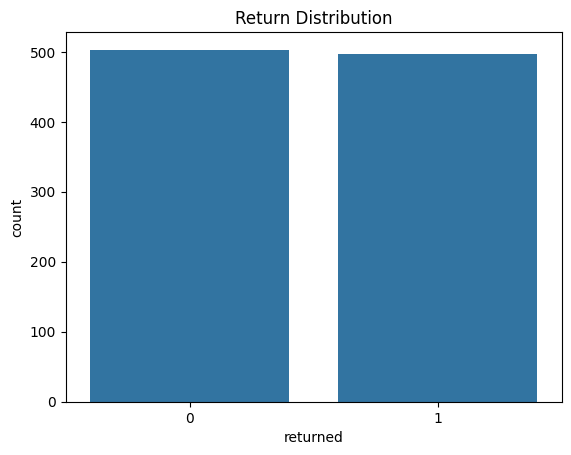

In [4]:
# Check missing values and data types
df_classification.info()
df_classification.describe()
df_classification.isnull().sum()

# Visualize target variable
sns.countplot(data=df_classification, x='returned')
plt.title("Return Distribution")
plt.show()


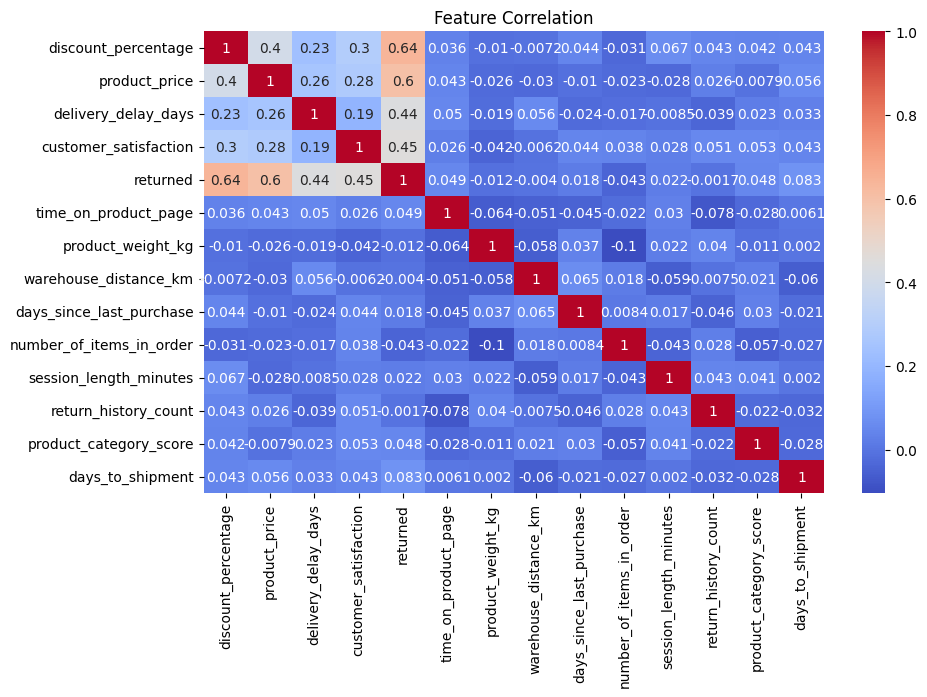

In [5]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_classification.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Product Return Prediction in E-Commerece (Model Results and Comparison)

In [6]:
# Split features and target
X = df_classification.drop('returned', axis=1)
y = df_classification['returned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Standardizes each feature to have mean = 0 and std = 1.

#Prevents models like KNN (which rely on distance) and Logistic Regression (which can be affected by feature magnitudes) from being biased toward features with larger scales (e.g., product_price vs time_on_product_page).


### Logistic Regression – Baseline Model (Default Parameters)

- **Logistic Regression** is a linear classification model that estimates the probability of a class label using a logistic function.
- It also ensures **fair coefficient estimation** by accounting for the scale and distribution of features — especially when paired with feature scaling.

#### Default Parameters Used:
- `penalty='l2'` Applies **Ridge regularization**, which discourages large coefficients and helps prevent overfitting.
- `C=1.0` This is the **inverse of regularization strength**. A lower value implies stronger regularization.
- `solver='lbfgs'` An efficient algorithm for L2-regularized logistic regression, especially suitable for smaller datasets.


In [7]:
#Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)



### K-Nearest Neighbors (KNN) – With Hyperparameter Tuning

- **KNN is a distance-based classification model** that predicts the label of a data point based on the majority class of its nearest neighbors.
- In this assignment, we enhanced KNN performance by tuning the **`k` (number of neighbors)** parameter.

#### Tuning Process:
- Defined a range of `k` values from 1 to 20:
  ```python
  param_grid = {'n_neighbors': range(1, 21)}


In [8]:
#KNN 

knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(knn_model, param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)
y_pred_knn = grid_knn.predict(X_test_scaled)

In [9]:
# Logistic Regression Metrics
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]))

# KNN Metrics
print("\nKNN Results:")
print(classification_report(y_test, y_pred_knn))
print("Best k:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, grid_knn.predict_proba(X_test_scaled)[:,1]))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       155
           1       0.92      0.91      0.91       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Accuracy: 0.9166666666666666
ROC AUC: 0.9764627363737487

KNN Results:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       155
           1       0.95      0.82      0.88       145

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

Best k: {'n_neighbors': 15}
Accuracy: 0.8933333333333333
ROC AUC: 0.9568409343715238


### Model Performance Comparison: Logistic Regression vs. KNN

####  Logistic Regression (Baseline Model)
- Shows **balanced performance** across both classes (kept and returned).
- Achieved a **very high ROC AUC**, indicating strong probability calibration and excellent class separation.
- Outperformed KNN slightly in terms of overall accuracy and F1-score.
- Robust to noise and consistent due to linear decision boundaries.

#### K-Nearest Neighbors (with Tuning)
- Demonstrated **high recall for class 0** (kept), but slightly **lower recall for class 1** (returned).
- Performed reasonably well but fell slightly short of logistic regression in key metrics.
- As a **distance-based model**, KNN is sensitive to the feature scaling — performance can vary based on data preprocessing.
- Tuning with `GridSearchCV` helped optimize the model by selecting the best `k` i.e. 15, but logistic regression remained the stronger performer overall.

> Overall, Logistic Regression was selected as the preferred model due to its balanced, stable performance and superior calibration.
